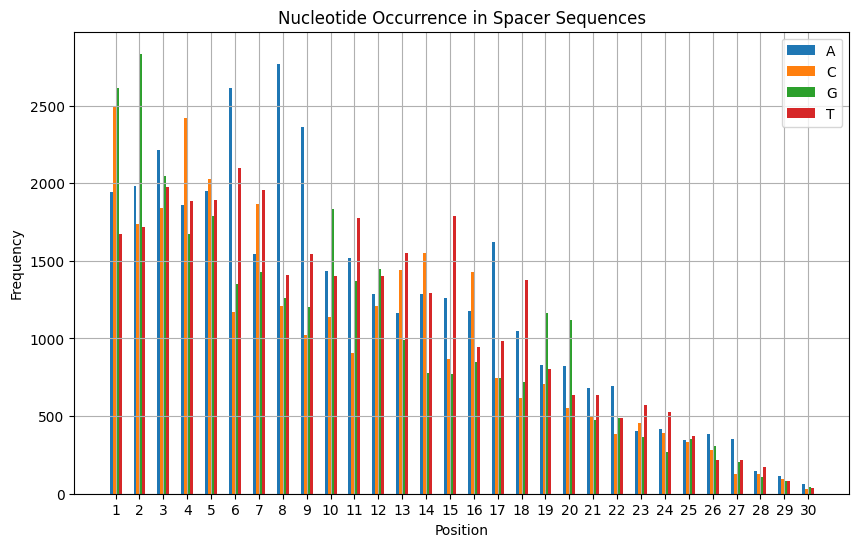

In [1]:
import matplotlib.pyplot as plt

def read_nucleotide_data(file_path):
    nucleotides_data = {'A': [], 'C': [], 'G': [], 'T': []}

    with open(file_path, 'r') as file:
        current_nucleotide = None
        for line in file:
            line = line.strip()
            if line in ['A', 'C', 'G', 'T']:
                current_nucleotide = line
            elif current_nucleotide:
                nucleotides_data[current_nucleotide].extend(map(int, line.split()))

    return nucleotides_data


def plot_nucleotide_occurrence(nucleotides_data):
    positions = list(range(1, 31))  # Positions from 1 to 30
    bar_width = 0.125  # Width of each bar

    plt.figure(figsize=(10, 6))

    # Plotting bars for each nucleotide separately
    for i, (nucleotide, frequencies) in enumerate(nucleotides_data.items()):
        plt.bar([pos + i * bar_width for pos in positions], frequencies[:30], bar_width, label=nucleotide)

    plt.xlabel('Position')
    plt.ylabel('Frequency')
    plt.title('Nucleotide Occurrence in Spacer Sequences')
    plt.xticks([pos + 1.5 * bar_width for pos in range(1, 31)], range(1, 31))
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
file_path = 'data.txt'  # Change this to your file path
nucleotides_data = read_nucleotide_data(file_path)

# Plotting bars for each nucleotide
plot_nucleotide_occurrence(nucleotides_data)


/var/folders/2m/0v64zk055gs7ltnr5hrlc0d00000gn/T/ipykernel_17252/2672457560.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(data))  # Get a colormap with enough colors


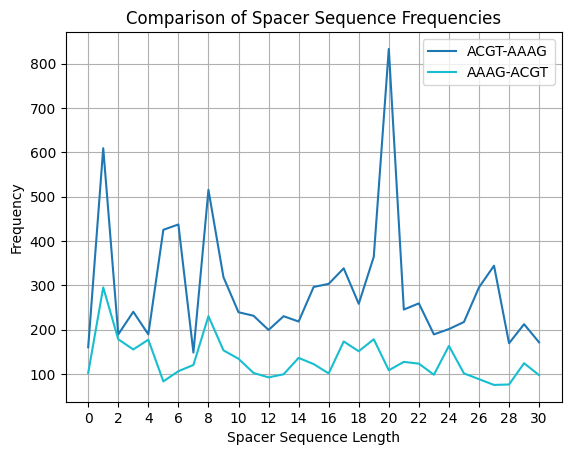

In [2]:
import matplotlib.pyplot as plt

def read_data(filename):
    data = []
    orientations = []
    with open(filename, 'r') as file:
        for line in file:
            line = line.strip()
            if not line.isdigit():  # Check if the line is non-numeric (i.e., orientation name)
                orientations.append(line)  # Store the orientation name
                data.append([])
            else:
                if len(data[-1]) <= 30:  # Limit to 30 lines of numeric data
                    data[-1].append(int(line))
    return data, orientations

def plot_frequency(data, orientations):
    colors = plt.cm.get_cmap('tab10', len(data))  # Get a colormap with enough colors
    for i, (frequencies, orientation) in enumerate(zip(data, orientations)):
        lengths = list(range(len(frequencies)))
        plt.plot(lengths, frequencies, label=f'{orientation}', color=colors(i))

    plt.xlabel('Spacer Sequence Length')
    plt.ylabel('Frequency')
    plt.title('Comparison of Spacer Sequence Frequencies')

    # Set x-ticks for every other index (0, 2, 4, ...)
    plt.xticks(range(0, len(data[0]), 2))

    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    filename = 'spacer_data.txt'  # Change this to your data file path
    spacer_data, orientations = read_data(filename)
    
    plot_frequency(spacer_data, orientations)
